## Prediction of Customer Churn Rates and analyzing the dependence of Churn on Age (in months).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel('Predicting Customer Churn at QWE Inc_UV6696-XLS-ENG.xlsx')
df = pd.DataFrame(data)
df.head()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,2,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,3,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,4,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,5,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


In [12]:
df = df.rename({'Customer Age (in months)': 'CAge', 'Churn (1 = Yes, 0 = No)':'Churn',
               'Days Since Last Login 0-1':'DaysSinceLastLogin'}, axis='columns')
print(df.describe())
df.dtypes

                ID         CAge        Churn  CHI Score Month 0  \
count  6347.000000  6347.000000  6347.000000        6347.000000   
mean   3174.000000    13.896802     0.050890          87.316685   
std    1832.365411    11.160078     0.219791          66.282788   
min       1.000000     0.000000     0.000000           0.000000   
25%    1587.500000     5.000000     0.000000          24.500000   
50%    3174.000000    11.000000     0.000000          87.000000   
75%    4760.500000    20.000000     0.000000         139.000000   
max    6347.000000    67.000000     1.000000         298.000000   

       CHI Score 0-1  Support Cases Month 0  Support Cases 0-1   SP Month 0  \
count    6347.000000            6347.000000        6347.000000  6347.000000   
mean        5.058610               0.706318          -0.006932     0.812781   
std        30.828767               1.723961           1.870942     1.320530   
min      -125.000000               0.000000         -29.000000     0.000000   
2

ID                              int64
CAge                            int64
Churn                           int64
CHI Score Month 0               int64
CHI Score 0-1                   int64
Support Cases Month 0           int64
Support Cases 0-1               int64
SP Month 0                    float64
SP 0-1                        float64
Logins 0-1                      int64
Blog Articles 0-1               int64
Views 0-1                       int64
 Days Since Last Login 0-1      int64
dtype: object

In [13]:
df['Churn']= df['Churn'].astype('category')
df.dtypes

ID                               int64
CAge                             int64
Churn                         category
CHI Score Month 0                int64
CHI Score 0-1                    int64
Support Cases Month 0            int64
Support Cases 0-1                int64
SP Month 0                     float64
SP 0-1                         float64
Logins 0-1                       int64
Blog Articles 0-1                int64
Views 0-1                        int64
 Days Since Last Login 0-1       int64
dtype: object

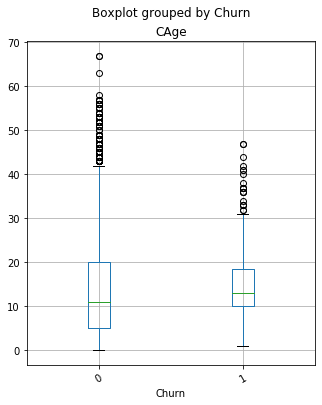

In [14]:
df.boxplot('CAge','Churn',rot = 30,figsize=(5,6))

Wall's belief about the dependence of Churn on Customer Age(in months) might be true afterall. A plot might help us understand this better. 

#### Multivariate Analysis

In [15]:
ChurnCount = df.groupby("Churn")["CAge"].count()
ChurnCount.head()

Churn
0    6024
1     323
Name: CAge, dtype: int64

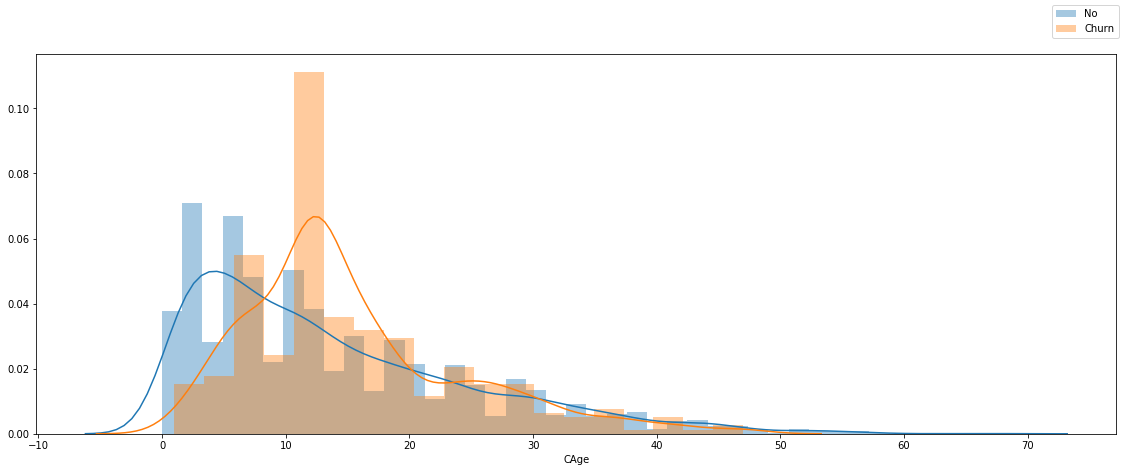

In [17]:
aug,ax = plt.subplots(1,1,figsize=(8,6))
aug.subplots_adjust(bottom=0.000012,right=2)

sns.distplot(df[df['Churn'] == 0]['CAge'],label="No")
sns.distplot(df[df['Churn'] == 1]['CAge'],label="Churn")

plt.figlegend();

From the plots we can see that the churn rate is high for age in months from 6 to 18 and the suddenly the rate drops, highest in the months in between 10 and 15, therefore, Wall's belief seems to be partially supported by the data that from 6 to 14 months there is a high risk of churn but there is a slight change in his theory, the group is 6 to 16 and not 14, when there are high chances of churn(riskiest group) it means that more than 18 months if a customer stays then, chances of churn is less or we could say that the customer is less likely to leave.


#### Logistic Regression Model that best predicts the probability that a customer leaves.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df,  test_size=0.33, random_state=42)

In [24]:
#X_test.head()
X_test.shape

(2095, 13)

In [25]:
#X_train.head()
X_train.shape

(4252, 13)

In [26]:
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as lm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [27]:
model = LogisticRegression(solver='liblinear', random_state=0)
feature_cols = ['CAge', 'CHI Score Month 0', 'CHI Score 0-1', 'Support Cases Month 0','Support Cases 0-1',
                'SP Month 0','SP 0-1','Logins 0-1', 'Blog Articles 0-1','Views 0-1']
X = X_train[feature_cols] # Features
y = X_train.Churn # Target variable
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
X_test1 = X_test[feature_cols]
model.classes_

array([0, 1], dtype=int64)

In [31]:
model.intercept_

array([-2.60675872])

In [32]:
model.coef_

array([[ 1.38758750e-02, -6.38417866e-03, -8.97070543e-03,
        -9.68915396e-02,  1.29113438e-01,  1.24881772e-02,
        -1.42213838e-02, -1.47579960e-03, -5.86639680e-03,
        -1.07253715e-04]])

In [33]:
model.score(X, y)

0.9503762935089369

In [55]:
#!pip install regressors

In [37]:
from sklearn.feature_selection import f_regression
from regressors import stats
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.274067
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4252
Model:                          Logit   Df Residuals:                     4242
Method:                           MLE   Df Model:                            9
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                 -0.3883
Time:                        17:15:58   Log-Likelihood:                -1165.3
converged:                       True   LL-Null:                       -839.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
CAge                     -0.0941      0.008    -12.444      0.000      -0.109      -0.

CAge, CHI Score Month 0, CHI Score 0-1, SP Month 0, SP 0-1, Logins 0-1, Views 0-1 all have significant influence (p>0.05) on Churn at a 95% confidence interval. At 99% confidence however, CAge, CHI Score Month 0, CHI Score 0-1, SP Month 0, Views 0-1, have an influence on Churn. 

In [38]:
ypred = result.predict(X_test1)
print(ypred)

730     0.034754
5642    0.035094
5263    0.453101
4525    0.066197
217     0.004845
5243    0.455472
3548    0.142413
3895    0.016918
6173    0.476499
3027    0.018976
2364    0.040263
6004    0.453101
465     0.002141
6047    0.453101
4019    0.284872
1183    0.000987
4793    0.476499
3912    0.008366
1263    0.025492
4127    0.028366
4896    0.039332
746     0.117258
1611    0.015340
3960    0.355433
80      0.001394
3781    0.476499
2880    0.079281
1616    0.155338
5400    0.453101
4922    0.144773
3336    0.017464
1513    0.002843
535     0.188054
4816    0.044319
2114    0.036716
1407    0.004471
3583    0.245121
5880    0.453101
622     0.184808
6087    0.453101
1662    0.024855
1330    0.076939
239     0.255895
2611    0.051830
4012    0.027736
2550    0.119085
3206    0.004923
1978    0.048051
2676    0.052877
1728    0.149182
1805    0.068689
3127    0.127487
3070    0.000283
4928    0.151773
496     0.135160
5970    0.453101
4979    0.394993
2764    0.078955
1782    0.0672

#### Classification Report

In [51]:
from sklearn.metrics import classification_report, accuracy_score
cutoff = 0.5
y_pred1 = np.where(ypred > cutoff, 1, 0)
y_actual = X_test["Churn"]
confmatrix = pd.crosstab(y_actual, y_pred1, rownames = ["Actual"],
                   colnames = ["Predicted"], margins = True)
print(confmatrix)

Predicted     0  1   All
Actual                  
0          1981  2  1983
1           112  0   112
All        2093  2  2095


In [52]:
accuracy = accuracy_score(y_actual,y_pred1)
print('Accuracy : %.2f' % accuracy + "%")

Accuracy : 0.95%


The classification acuuracy of the model is 95%. 

In [54]:
print(classification_report(y_actual, y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1983
           1       0.00      0.00      0.00       112

    accuracy                           0.95      2095
   macro avg       0.47      0.50      0.49      2095
weighted avg       0.90      0.95      0.92      2095



The highest churn probabilities are sorted below.

In [41]:
sort1 = sorted(ypred,reverse=True)[:5]
sort1

[0.5290132496272498,
 0.5205484038112651,
 0.49676105295198053,
 0.47649880721159316,
 0.47649880721159316]